<a href="https://colab.research.google.com/github/Airukua/backpro/blob/main/Backpro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
path ='/content/drive/MyDrive/yanti1'

In [ ]:
df = pd.read_excel(path)

In [ ]:
x = df[['x1','x2']]
y = df[['y']]

In [ ]:
import numpy as np

In [ ]:
x = np.array(x)
y = np.array(y)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
x_norm = scaler.fit_transform(x)
y_norm = scaler.fit_transform(y.reshape(-1,1))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(100, input_dim=2, activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(loss='mse', optimizer='adam')

In [ ]:
%%time
history = model.fit(x_norm, y_norm, epochs=500, verbose=1)

Epoch 1/500
1/1 [==============================] - 1s 568ms/step - loss: 0.0500
Epoch 2/500
1/1 [==============================] - 0s 15ms/step - loss: 0.0498
Epoch 3/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0497
Epoch 4/500
1/1 [==============================] - 0s 8ms/step - loss: 0.0496
Epoch 5/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0494
Epoch 6/500
1/1 [==============================] - 0s 10ms/step - loss: 0.0492
Epoch 7/500
1/1 [==============================] - 0s 8ms/step - loss: 0.0491
Epoch 8/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0490
Epoch 9/500
1/1 [==============================] - 0s 8ms/step - loss: 0.0488
Epoch 10/500
1/1 [==============================] - 0s 18ms/step - loss: 0.0487
Epoch 11/500
1/1 [==============================] - 0s 10ms/step - loss: 0.0485
Epoch 12/500
1/1 [==============================] - 0s 8ms/step - loss: 0.0484
Epoch 13/500
1/1 [==============================] - 0s 

In [ ]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'epoch')

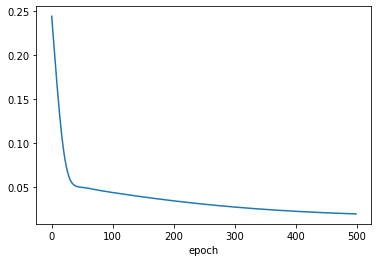

In [ ]:
plt.plot(history.history['loss'],label='loss')
plt.xlabel('epoch')

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
X_t=np.array([[82, 81], [85, 87], [87, 88], [88, 89], [89, 92], [92, 94], [94, 95], [95, 97], [97, 99], [99, 100], [100, 98], [98, 97], [97, 94], [94, 91], [91, 90], [90, 88], [88, 85], [85, 83], [83, 82], [82, 83]])
y_t=np.array ([85,87,89,70,72,72,85,90,95,92,93,97,98,50,56,90,80,75,85,60])

In [ ]:
X_test = scaler.fit_transform(X_t)
y_test = scaler.fit_transform(y_t.reshape(-1,1))

In [ ]:
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("RMSE on test data:", rmse)

1/1 [==============================] - 0s 106ms/step
RMSE on test data: 0.32117975104793267


In [ ]:
y_pred

array([[0.14698197],
       [0.32172945],
       [0.384389  ],
       [0.43344498],
       [0.5493307 ],
       [0.6609342 ],
       [0.7178482 ],
       [0.7787423 ],
       [0.83827084],
       [0.87008315],
       [0.8476398 ],
       [0.8112921 ],
       [0.7326406 ],
       [0.6021012 ],
       [0.51869535],
       [0.43560305],
       [0.31045452],
       [0.2179348 ],
       [0.17452253],
       [0.18353432]], dtype=float32)

In [ ]:
from keras.models import load_model

# Menyimpan model ke dalam file
model.save('pred_nilai.h5')